In [1]:
import nltk
from nltk import word_tokenize, sent_tokenize
import gensim # for words to vector
from gensim.models.word2vec import Word2Vec
from sklearn.manifold import TSNE # for converting high to lower dimension
import pandas as pd
from bokeh.io import output_notebook
from bokeh.plotting import show, figure
%matplotlib inline

C:\Amrendra\Anaconda\lib\site-packages\gensim\utils.py:1212: UserWarning: detected Windows; aliasing chunkize to chunkize_serial
  warnings.warn("detected Windows; aliasing chunkize to chunkize_serial")


In [2]:
nltk.download('punkt') # Used for english text tokenizer. Enable us to convert row text to tokens

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Amrendra\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

#### load data

In [3]:
nltk.download('gutenberg')

[nltk_data] Downloading package gutenberg to
[nltk_data]     C:\Users\Amrendra\AppData\Roaming\nltk_data...
[nltk_data]   Package gutenberg is already up-to-date!


True

In [4]:
from nltk.corpus import gutenberg

In [5]:
gutenberg.fileids()

['austen-emma.txt',
 'austen-persuasion.txt',
 'austen-sense.txt',
 'bible-kjv.txt',
 'blake-poems.txt',
 'bryant-stories.txt',
 'burgess-busterbrown.txt',
 'carroll-alice.txt',
 'chesterton-ball.txt',
 'chesterton-brown.txt',
 'chesterton-thursday.txt',
 'edgeworth-parents.txt',
 'melville-moby_dick.txt',
 'milton-paradise.txt',
 'shakespeare-caesar.txt',
 'shakespeare-hamlet.txt',
 'shakespeare-macbeth.txt',
 'whitman-leaves.txt']

#### Tokenize text

In [6]:
gberg_sent_tokens = sent_tokenize(gutenberg.raw())

In [7]:
gberg_sent_tokens[0:1]

['[Emma by Jane Austen 1816]\n\nVOLUME I\n\nCHAPTER I\n\n\nEmma Woodhouse, handsome, clever, and rich, with a comfortable home\nand happy disposition, seemed to unite some of the best blessings\nof existence; and had lived nearly twenty-one years in the world\nwith very little to distress or vex her.']

In [8]:
gbers_sents = gutenberg.sents() # another method to achieve sentense tokens as above

#### Run word2vec

In [13]:
gbers_sents

[['[', 'Emma', 'by', 'Jane', 'Austen', '1816', ']'], ['VOLUME', 'I'], ...]

In [14]:
model = Word2Vec(sentences=gbers_sents, size=64, sg=1, window=10, min_count=5, seed=42)

In [15]:
model.save('raw_gutenberg_model.w2v')

In [16]:
model['dog']

C:\Amrendra\Anaconda\lib\site-packages\ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  """Entry point for launching an IPython kernel.


array([ 0.08234486,  0.07526459,  0.10697599, -0.21346031, -0.01489574,
        0.13557763,  0.1193143 ,  0.08031782, -0.3040332 ,  0.07717395,
       -0.04891181,  0.14640889,  0.16748571, -0.00505333,  0.14416367,
        0.08403249, -0.15007584, -0.23237786, -0.3871107 ,  0.62378955,
       -0.2562857 ,  0.30015802, -0.24602175, -0.12394248, -0.05237265,
       -0.24613598,  0.04205228, -0.35195017,  0.2752212 ,  0.41693524,
       -0.20243618,  0.6156569 , -0.19427672, -0.31165582,  0.20933206,
       -0.33839068,  0.00601233, -0.35418352, -0.5654532 , -0.19899696,
       -0.0545054 , -0.56363046,  0.14260569,  0.12806165,  0.33008683,
        0.04113197,  0.40889314,  0.37954986, -0.4575581 , -0.11881743,
        0.4931203 , -0.3593683 , -0.04606351,  0.598433  , -0.5074223 ,
        0.09250464,  0.14007884, -0.2836066 , -0.17768852,  0.66633797,
        0.09041058, -0.17460321, -0.11214712, -0.0252887 ], dtype=float32)

In [17]:
model.most_similar('dog')

C:\Amrendra\Anaconda\lib\site-packages\ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `most_similar` (Method will be removed in 4.0.0, use self.wv.most_similar() instead).
  """Entry point for launching an IPython kernel.
C:\Amrendra\Anaconda\lib\site-packages\gensim\matutils.py:737: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int32 == np.dtype(int).type`.
  if np.issubdtype(vec.dtype, np.int):


[('puppy', 0.8469233512878418),
 ('cage', 0.7681804895401001),
 ('thief', 0.7583373785018921),
 ('sweeper', 0.7583295702934265),
 ('broth', 0.7560921311378479),
 ('pet', 0.7546173930168152),
 ('shell', 0.7411530017852783),
 ('pig', 0.7385654449462891),
 ('wid', 0.7326341867446899),
 ('lazy', 0.7325006723403931)]

In [19]:
model.most_similar('think')

C:\Amrendra\Anaconda\lib\site-packages\ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `most_similar` (Method will be removed in 4.0.0, use self.wv.most_similar() instead).
  """Entry point for launching an IPython kernel.
C:\Amrendra\Anaconda\lib\site-packages\gensim\matutils.py:737: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int32 == np.dtype(int).type`.
  if np.issubdtype(vec.dtype, np.int):


[('suppose', 0.871349573135376),
 ('downright', 0.8292746543884277),
 ('contradict', 0.8238722085952759),
 ('manage', 0.8237000703811646),
 ('know', 0.8167046308517456),
 ('NOW', 0.8091005086898804),
 ('pretend', 0.8057194352149963),
 ('_you_', 0.800159215927124),
 ('expect', 0.7997573614120483),
 ('marries', 0.7973031997680664)]

In [20]:
model.most_similar(positive=['father','women'], negative=['man']) # Arthematic operations 

C:\Amrendra\Anaconda\lib\site-packages\ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `most_similar` (Method will be removed in 4.0.0, use self.wv.most_similar() instead).
  """Entry point for launching an IPython kernel.
C:\Amrendra\Anaconda\lib\site-packages\gensim\matutils.py:737: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int32 == np.dtype(int).type`.
  if np.issubdtype(vec.dtype, np.int):


[('daughters', 0.7475277185440063),
 ('elder', 0.6522413492202759),
 ('wives', 0.6512744426727295),
 ('concubines', 0.6459640264511108),
 ('mother', 0.6399692893028259),
 ('daughter', 0.6372336149215698),
 ('Esau', 0.6346902847290039),
 ('brethren', 0.6320881843566895),
 ('sister', 0.63172847032547),
 ('sisters', 0.6290560960769653)]

In [27]:
len(model.wv.vocab)

17011

In [29]:
x = model[model.wv.vocab]

C:\Amrendra\Anaconda\lib\site-packages\ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  """Entry point for launching an IPython kernel.


In [41]:
tsne = TSNE(n_components=2, n_iter=1000)

In [42]:
x_2d = tsne.fit_transform(x)

In [43]:
coords_df = pd.DataFrame(x_2d, columns=['x','y'])
coords_df['token'] = model.wv.vocab.keys()

In [44]:
coords_df.head()

,x,y,token
0,-47.064053,40.381042,[
1,-60.893417,12.448948,Emma
2,-7.712646,56.551472,by
3,-60.464710,14.874747,Jane
4,-47.040485,40.329456,]


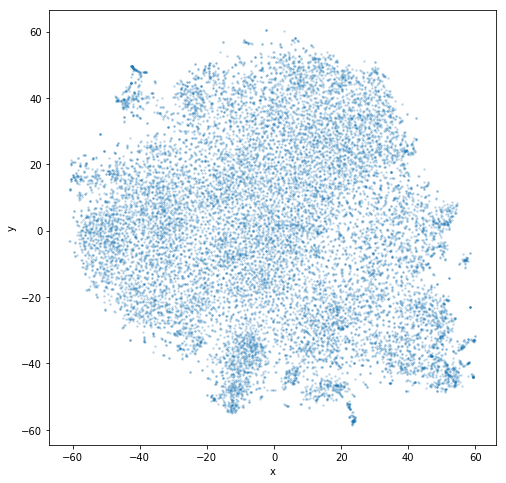

In [45]:
_ = coords_df.plot.scatter('x','y', figsize=(8,8), marker='.', s=10, alpha=0.2)

In [46]:
output_notebook()

Loading BokehJS ...

In [47]:
subset_df = coords_df.sample(n=5000)

In [50]:
p = figure(plot_width=600, plot_height=600)
_=p.text(x=subset_df.x, y=subset_df.y,text=subset_df.token)

In [51]:
show(p)